In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import string
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from transformers import AutoTokenizer, AutoModel
from torch import cuda
from tqdm import tqdm
import numpy as np
import torch.nn.functional as F
import torch
from xgboost import XGBClassifier
import emoji
import optuna
from tqdm import tqdm
np.random.seed(0)

In [ ]:
clean_df = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/pure_data.csv')

In [ ]:
clean_df = clean_df.drop(columns=['Unnamed: 0'])

In [ ]:
clean_df = clean_df.dropna()

In [ ]:
clean_df = clean_df.drop_duplicates()

In [ ]:
clean_df  = clean_df.reset_index(drop=True)

In [ ]:
def latin_to_cyrillic(text):
    # Словарь соответствий: латинские -> кириллические
    mapping = {
        'A': 'А', 'a': 'а',
        'e': 'е',
        'b': 'в', 'k': 'к',
        'k': 'к', 'h': 'н',
        'O': 'О', 'o': 'о',
        'P': 'Р', 'C': 'С', 'c': 'с',
        'T': 'Т', 'X': 'Х',
        'y': 'у', 'Y': 'У',
        'x': 'х',
        'r': 'г',
        'n': 'п',
        'i': 'и',
        'm': 'м',
        'l': 'л',
        'd': 'д',
        's': 'с',
        'u': 'и',
        'z': 'з',
    }

    return ''.join(mapping.get(char, char) for char in text)
def convert_emojis_to_words(text):

    # Convert emojis to words
    text = emoji.replace_emoji(text, replace="")

    # Remove the : from the words and replace _ with space
    text = text.replace("_", " ")

    return text

In [ ]:
symbols_pattern = re.compile(pattern = "["
    "@_!#$%^&*()<>?/\|}{~√•—"
                       "]+", flags = re.UNICODE) #спецсимволы
# двойные пробелы
space_pattern = re.compile('\s+')
#exclude = set(string.punctuation) # удаление пунктуации
def clear_text(text):
    """ Функция удаления спецсимволов"""
    # удаление спецсимволов и emoji
    pre = symbols_pattern.sub(r'',text)
    pre1 = convert_emojis_to_words(pre)

    return space_pattern.sub(' ', pre1)

In [ ]:
def preprocess_text(text):
    """ Финальная функция для обработки """
    # srip + lower + punctuation
    sentence = (
        ''.join([x for x in str(text).strip().lower()])
    )
    sentence = latin_to_cyrillic(sentence)

    return clear_text(sentence)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/my_data2 .csv')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/my_data22.csv')

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
values = {'Стаж работы': 0,'Компания': 0, 'Обязанности': 0, "О себе": 0}
df = df.fillna(value=values)

In [ ]:
df = df.drop(index =687)

In [ ]:
df = df.dropna()

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
X = clean_df.drop(columns=['Оценка'])
y = clean_df['Оценка']

In [ ]:
y.value_counts()

,count
Оценка,
2,849
1,445
8,253
6,217
10,207
3,203
4,156
7,86
5,79


In [ ]:
X = X['message.text'].apply(preprocess_text)

In [ ]:
y.value_counts()

,count
Оценка,
2,849
1,445
8,253
6,217
10,207
3,203
4,156
7,86
5,79


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True, stratify = y)

In [ ]:
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

# **Multilingual-e5-large-instruct**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-large-instruct")
model = AutoModel.from_pretrained("intfloat/multilingual-e5-large-instruct")
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

XLMRobertaModel(
  (embeddings): XLMRobertaEmbeddings(
    (word_embeddings): Embedding(250002, 1024, padding_idx=1)
    (position_embeddings): Embedding(514, 1024, padding_idx=1)
    (token_type_embeddings): Embedding(1, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): XLMRobertaEncoder(
    (layer): ModuleList(
      (0-23): 24 x XLMRobertaLayer(
        (attention): XLMRobertaAttention(
          (self): XLMRobertaSdpaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): XLMRobertaSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, eleme

In [ ]:
def embed_text(text):
    t = tokenizer(text, padding= True, truncation=True, max_length=512,  return_tensors='pt' )
    with torch.no_grad():
      model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

In [ ]:
x = np.zeros((len(X_train), 1024))
y =np.array(y_train)


In [ ]:
for ind, sent in enumerate(tqdm(X_train)):
   x[ind] = embed_text(sent)

100%|██████████| 2021/2021 [00:35<00:00, 56.74it/s]


In [ ]:
x_test = np.zeros((len(X_test), 1024))
y_test =np.array(y_test)

In [ ]:
for ind, sent in enumerate(tqdm(X_test)):
  x_test[ind] = embed_text(sent)

100%|██████████| 506/506 [00:08<00:00, 58.60it/s]


## LogisticRegression


In [ ]:
logistic_reg = LogisticRegression(max_iter=2000)
logistic_reg.fit(x, y)

LogisticRegression(max_iter=2000)

In [ ]:
pred = logistic_reg.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy for LogisticRegression :", accuracy_score(y_test, pred))
print( "F1-score for LogisticRegression:", f1_score(y_test, pred, average='weighted'))
print("Balanced accuracy forLogisticRegression:", balanced_accuracy_score(y_test,pred))

Accuracy for LogisticRegression : 0.6086956521739131
F1-score for LogisticRegression: 0.5448829663677351
Balanced accuracy forLogisticRegression: 0.38937452302631126


In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
def conf_matrix(y_test, pred):
  cm = confusion_matrix(y_test, pred, labels=np.unique(y_test))

  fig, ax = plt.subplots(figsize=(6,6))
  im = ax.imshow(cm, interpolation='nearest', aspect='auto')
  unique_labels = np.unique(y_test).astype(int)
  ax.set_xticks(range(9))
  ax.set_yticks(range(9))
  ax.set_xticklabels(unique_labels, rotation=45)
  ax.set_yticklabels(unique_labels)
  ax.set_ylabel('Истинный класс')
  ax.set_xlabel('Предсказанный класс')
  fig.colorbar(im, ax=ax)
  plt.tight_layout()
  plt.show()

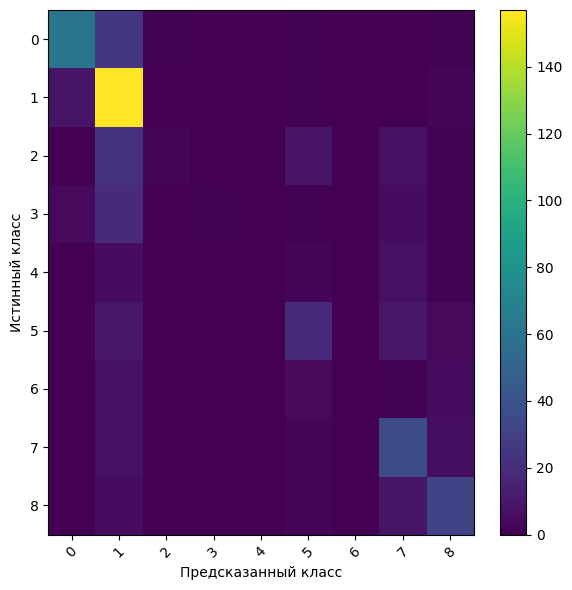

In [ ]:
conf_matrix(y_test, pred)

In [ ]:
def get_metrics_per_class(y_test, pred):
  classes = np.unique(y_test)

  # 1) F1-score по классам
  f1_per_class = f1_score(y_test, pred, labels=classes, average=None, zero_division=0)

  # 2) «Точность по классу» как доля правильно предсказанных среди всех примеров этого класса
  #    (этот показатель в мультиклассе эквивалентен recall для данного класса)
  accuracy_per_class = np.array([
      np.mean(pred[y_test == cls] == cls)
      for cls in classes
  ])

  # 3) Собираем всё в DataFrame
  df = pd.DataFrame({
      'class': classes.astype(str),
      'accuracy': accuracy_per_class,
      'f1_score': f1_per_class,
      'balanced_accuracy': ba
  }).set_index('class')
  return df

In [ ]:
get_metrics_per_class(y_test, pred)

,accuracy,f1_score,balanced_accuracy
class,,,
0,0.685393,0.748466,0.809316
1,0.923529,0.733645,0.809316
2,0.048780,0.090909,0.809316
3,0.032258,0.062500,0.809316
4,0.000000,0.000000,0.809316
5,0.441860,0.452381,0.809316
6,0.000000,0.000000,0.809316
7,0.705882,0.571429,0.809316
8,0.666667,0.627451,0.809316


## XGB Boosting

In [ ]:
def objective(trial):
    params = {
        "objective": "multi:softmax",
        "num_class": 9,
        "eval_metric": "mlogloss",
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.0001, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 100),
        "n_estimators": trial.suggest_int("n_estimators", 50, 2000),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0)
    }

    model = XGBClassifier(**params)
    model.fit(x, y)

    y_pred = model.predict(x_test)
    return f1_score(y_test, y_pred, average='weighted')

# Запуск оптимизации
study = optuna.create_study(direction="maximize")  # Ищем max accuracy
study.optimize(objective, n_trials=50)

# Лучшие параметры
print("Лучшие параметры:", study.best_params)

In [ ]:
xgb2 = XGBClassifier(objective="multi:softmax", num_class=9, eval_metric="mlogloss", learning_rate = 0.013619072808128348, max_depth = 80, n_estimators = 1475, subsample = 0.5532740909498545, colsample_bytree = 0.38984815838162784)
# Предсказания и оценка
xgb2.fit(x, y)
y_pred = xgb2.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6620553359683794


In [ ]:
print("Accuracy for XGB:", accuracy_score(y_test, y_pred))
print( "F1-score for XGB:", f1_score(y_test, y_pred, average='weighted'))
print("Balanced accuracy for XGB:", balanced_accuracy_score(y_test,y_pred))

Accuracy for XGB: 0.6620553359683794
F1-score for XGB: 0.6425916879111062
Balanced accuracy for XGB: 0.49201643848460436


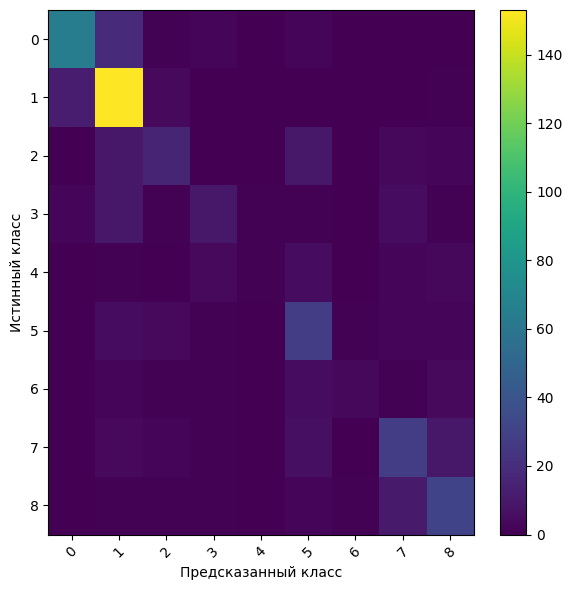

In [ ]:
conf_matrix(y_test,y_pred)

In [ ]:
get_metrics_per_class(y_test,y_pred)

,accuracy,f1_score
class,,
0,0.730337,0.773810
1,0.900000,0.816000
2,0.390244,0.450704
3,0.322581,0.392157
4,0.062500,0.111111
5,0.651163,0.549020
6,0.176471,0.272727
7,0.549020,0.543689
8,0.645833,0.607843


from matplotlib import pyplot as plt
_df_0['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['f1_score'].plot(kind='hist', bins=20, title='f1_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='accuracy', y='f1_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['f1_score'].plot(kind='line', figsize=(8, 4), title='f1_score')
plt.gca().spines[['top', 'right']].set_visible(False)

# **GigarEmbedModel**

In [ ]:
!pip install transformers==4.46.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.1 MB/s eta 0:00:00
Reason for being yanked: This version unfortunately does not work with 3.8 but we did not drop the support yet
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 104.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3


In [ ]:
!pip install datasets

In [ ]:
model1 = AutoModel.from_pretrained('ai-sage/Giga-Embeddings-instruct', trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/47.8k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.02M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
model1.to(device)

GigarEmbedModel(
  (latent_attention_model): LatentAttentionModel(
    (cross_attend_blocks): ModuleList(
      (0-1): 2 x PreNorm()
    )
  )
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048, padding_idx=2)
    (layers): ModuleList(
      (0-26): 27 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=11008, bias=False)
          (up_proj): Linear(in_features=2048, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (in

In [ ]:
def get_embeddings(text):
  task_name_to_instruct = {"example": "получая пример, присвой ему метку класса"}
  query_prefix = task_name_to_instruct["example"] + "\nquestion: "
  queries = [text]
  query_embeddings = model1.encode(queries, instruction=query_prefix)
  query_embeddings = F.normalize(query_embeddings, p=2, dim=1)
  return query_embeddings[0].cpu().numpy()



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True, stratify=y)

In [ ]:
x1 = np.zeros((len(X_train), 2048))

In [ ]:
y1 = np.array(y_train)

In [ ]:
for ind, sent in enumerate(tqdm(X_train)):
   x1[ind] =  get_embeddings(sent)

100%|██████████| 2021/2021 [01:34<00:00, 21.43it/s]


In [ ]:
x1_test = np.zeros((len(X_test), 2048))

In [ ]:
y1_test = np.array(y_test)

In [ ]:
for ind, sent in enumerate(tqdm(X_test)):
   x1_test[ind] =  get_embeddings(sent)

100%|██████████| 506/506 [00:23<00:00, 21.12it/s]


## LogisticRegression

In [ ]:
logistic_reg = LogisticRegression(max_iter=2000)
logistic_reg.fit(x1, y1)

LogisticRegression(max_iter=2000)

In [ ]:
pred = logistic_reg.predict(x1_test)

In [ ]:
print("Accuracy for Logistic Regression:", accuracy_score(y1_test, pred))
print("F1 score for Logistic Regression:", f1_score(y1_test, pred, average='weighted'))
print("Balanced accuracy for Logistic Regression:",balanced_accuracy_score(y1_test,pred))

Accuracy for Logistic Regression: 0.5830039525691699
F1 score for Logistic Regression: 0.5246918094626113
Balanced accuracy for Logistic Regression: 0.3634265974378645


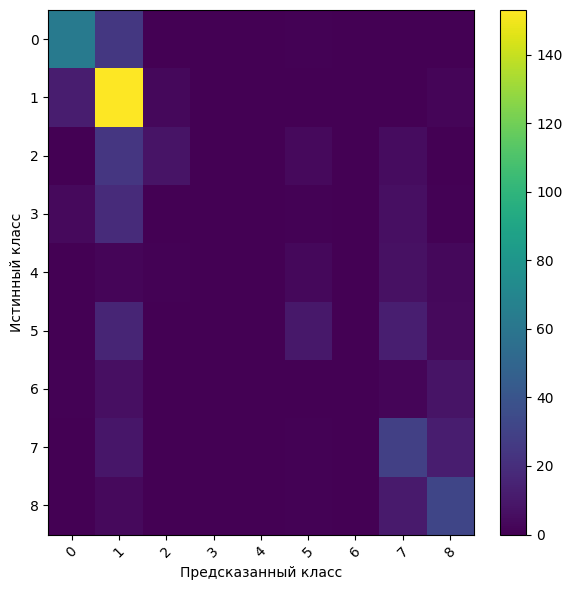

In [ ]:
conf_matrix(y_test, pred)

In [ ]:
get_metrics_per_class(y_test, pred)

,accuracy,f1_score
class,,
0,0.707865,0.745562
1,0.900000,0.714953
2,0.195122,0.301887
3,0.000000,0.000000
4,0.000000,0.000000
5,0.232558,0.312500
6,0.000000,0.000000
7,0.568627,0.467742
8,0.666667,0.581818


## XGB Boosting

In [ ]:
def objective(trial):
    params = {
        "objective": "multi:softmax",
        "num_class": 9,
        "eval_metric": "mlogloss",
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.00001, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 100),
        "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0)
    }

    model = XGBClassifier(**params)
    model.fit(x1, y1)

    y_pred = model.predict(x1_test)
    return f1_score(y1_test, y_pred, average='weighted')

# Запуск оптимизации
study = optuna.create_study(direction="maximize")  # Ищем max f1
study.optimize(objective, n_trials=50)

# Лучшие параметры
print("Лучшие параметры:", study.best_params)

In [ ]:
xgb = XGBClassifier(objective="multi:softmax", num_class=9, eval_metric="mlogloss", learning_rate = 0.15340579087649192, max_depth = 28, n_estimators = 788, subsample = 0.5355661444792579, colsample_bytree =  0.8338931922625114)
xgb.fit(x1, y1)

# Предсказания и оценка
y_pred = xgb.predict(x1_test)
print("Accuracy for XGB:", accuracy_score(y1_test, y_pred))
print("F1 score for XGB:",f1_score(y_test, y_pred, average='weighted'))
print("Balanced accuracy for XGB:", balanced_accuracy_score(y_test,y_pred))

Accuracy for XGB: 0.66600790513834
F1 score for XGB: 0.6451371350547289
Balanced accuracy for XGB: 0.4997059590035831


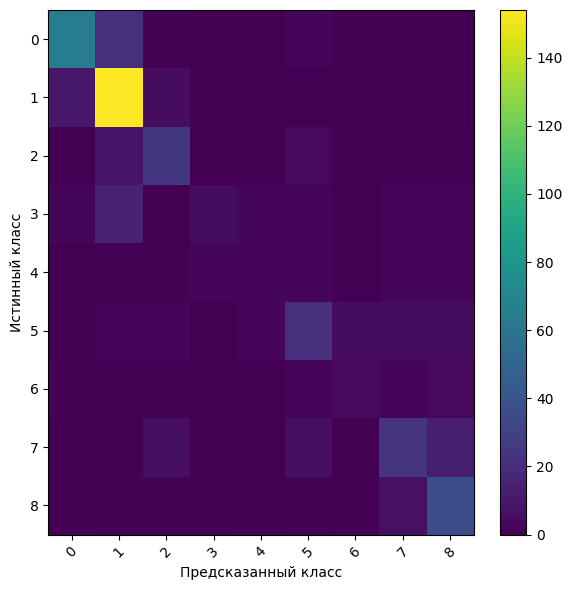

In [ ]:
conf_matrix(y_test, y_pred)

In [ ]:
get_metrics_per_class(y_test, y_pred)

,accuracy,f1_score
class,,
0,0.730337,0.773810
1,0.905882,0.821333
2,0.609756,0.602410
3,0.161290,0.238095
4,0.125000,0.181818
5,0.488372,0.494118
6,0.235294,0.296296
7,0.470588,0.494845
8,0.770833,0.654867
